## Data Exploration

### 1. Import:

In [2]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data exploration:

#### 2.1. Read data from file:

In [3]:
path = os.path.join('..', 'Assert', 'ingredients.csv')
raw_df = pd.read_csv(path)
raw_df.head()

,Name of dish,soda,turmeric mixture,herb,yogurt,butter,beef bone,chili lemongrass fish sauce,beef fillet,chipotle smoked pepper powder,...,kiwi,lime juice,tea leaves,white sesame,eel,green onion,ice cubes,pigeon,chinese sausages,white vinegar
0,10 common problems and mistakes when making bread,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11 ways to use leftover egg yolks,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12 types of nuts for baking,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14 ways to make Sponge cake/Gato for birthday ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14 ways to use leftover egg whites,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.2. Explore data:

##### - How many rows and how many columns?

In [4]:
shape = raw_df.shape
shape

(1057, 814)

The raw dataset has *...* rows and *...* columns, which satisfies the requirements about the size of dataset.

##### - What are the meaning of each row?

Each row contains the information about the ingredients of a dish.

##### - Are there duplicated rows?

In [5]:
def count_duplicated_rows(df: pd.DataFrame) -> bool:
    duplicated_df = df[df.duplicated(keep='first')]
    num_duplicated = duplicated_df.shape[0]
    return num_duplicated

In [6]:
print(f"Number of duplicated rows: {count_duplicated_rows(raw_df)}")

Number of duplicated rows: 82


The raw dataset contains ... duplicated rows, so let's remove them.

In [7]:
raw_df = raw_df.drop_duplicates()

In [8]:
print(f"Number of duplicated rows after update raw data: {count_duplicated_rows(raw_df)}")

Number of duplicated rows after update raw data: 0


##### - What are the meaning of each column?

- The first column `Name of dish` contains the name of each dish.
- The remaining columns represent each ingredient with the value of each cell in the column being 0 if the dish doesn't have this ingredient and 1 if it has.

##### - What is the current data type of each column? Are there columns having inappropriate data types?

In [9]:
raw_df.dtypes.to_dict()

{'Name of dish': dtype('O'),
 'soda': dtype('int64'),
 'turmeric mixture': dtype('int64'),
 'herb': dtype('int64'),
 'yogurt': dtype('int64'),
 'butter': dtype('int64'),
 'beef bone': dtype('int64'),
 'chili lemongrass fish sauce': dtype('int64'),
 'beef fillet': dtype('int64'),
 'chipotle smoked pepper powder': dtype('int64'),
 'cocoa powder': dtype('int64'),
 'tea po green tea pork sausage': dtype('int64'),
 'cashew': dtype('int64'),
 'cherry tomatoes': dtype('int64'),
 'sticky rice flour': dtype('int64'),
 'virgin olive oil': dtype('int64'),
 'bbq sauce': dtype('int64'),
 'cinnamon': dtype('int64'),
 'oyster sauce': dtype('int64'),
 'green': dtype('int64'),
 'rice flour': dtype('int64'),
 'dumpling skins': dtype('int64'),
 'american beef belly': dtype('int64'),
 'nutmeg': dtype('int64'),
 'bbq marinade': dtype('int64'),
 'low-fat mayonnaise': dtype('int64'),
 'wood ear mushroom': dtype('int64'),
 'peanut': dtype('int64'),
 'dark rum': dtype('int64'),
 'black pepper': dtype('int64'),

All the columns of the raw data seem to have appropritate types for their meanings.

##### - With each numerical column, how are values distributed?

- What is the percentage of missing values?

In [10]:
# collect numerical columns' data
numerical_cols = raw_df[raw_df.keys()[1:]]
numerical_cols.head()

,soda,turmeric mixture,herb,yogurt,butter,beef bone,chili lemongrass fish sauce,beef fillet,chipotle smoked pepper powder,cocoa powder,...,kiwi,lime juice,tea leaves,white sesame,eel,green onion,ice cubes,pigeon,chinese sausages,white vinegar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
missing_values = numerical_cols.isnull().sum()
missing_values

soda                0
turmeric mixture    0
herb                0
yogurt              0
butter              0
                   ..
green onion         0
ice cubes           0
pigeon              0
chinese sausages    0
white vinegar       0
Length: 813, dtype: int64

In [12]:
if all(missing_values == 0):
    print("No missing values in the numerical columns")

No missing values in the numerical columns


- Min? Max? Are they abnormal?

In [13]:
if all(numerical_cols.min() == 0) and all(numerical_cols.max() == 1):
    print("All the values of numerical columns are normal (between 0 and 1).")
else:
    abnormal_columns = numerical_cols.columns[
        ~((0 <= numerical_cols.min() <= 1) & (0 <= numerical_cols.max() <= 1))
    ]
    print(f"There are some values that are not normal in columns: {abnormal_columns}.")

All the values of numerical columns are normal (between 0 and 1).


##### - With each categorical column, how are values distributed?

- What is the percentage of missing values?

In [14]:
categorical_col = raw_df[raw_df.keys()[0]]
categorical_col.head()

0    10 common problems and mistakes when making bread
1                    11 ways to use leftover egg yolks
2                          12 types of nuts for baking
3    14 ways to make Sponge cake/Gato for birthday ...
4                   14 ways to use leftover egg whites
Name: Name of dish, dtype: object

In [15]:
missing_values = categorical_col.isnull().sum()
missing_values

0

In [16]:
if missing_values == 0:
    print("No missing values in the categorical columns")

No missing values in the categorical columns


- How many different values? Show a few


In [17]:
unique_values = categorical_col.unique()
print(f"There are {len(unique_values)} different values in this column.")

There are 975 different values in this column.


In [18]:
print('Some examples of name of dish:\n', unique_values[:10])

Some examples of name of dish:
 ['10 common problems and mistakes when making bread'
 '11 ways to use leftover egg yolks' '12 types of nuts for baking'
 '14 ways to make Sponge cake/Gato for birthday cake decoration'
 '14 ways to use leftover egg whites'
 '4 ways to make Flan – Creme caramel simple but delicious'
 '6 delicious cookies using only egg yolks'
 "9 delicious pancakes that don't require an oven"
 'Amaretti – almond cookies'
 'Answers to questions about moon cake ingredients']


#### Check if the data is reasonable?
 - Is there any item where the ingredients are all 0?
 - Is there any column where all values ​​are 0?

In [19]:
# Check rows
all_zero_ingredients = raw_df[(raw_df.iloc[:, 1:] == 0).all(axis=1)]
num_all_zero_ingredients = all_zero_ingredients.shape[0]
num_all_zero_ingredients
if num_all_zero_ingredients > 0:
    print(f"Number of rows that all ingredients are zero: {num_all_zero_ingredients}")
    raw_df = raw_df.drop(all_zero_ingredients.index)
    print("Remove all zero ingredients rows.")
# check columns
raw_df = raw_df.loc[:, ~(raw_df == 0).all()]

Number of rows that all ingredients are zero: 2
Remove all zero ingredients rows.


### ___3. Data analysis:___
#### ___Phần 1: Phân tích sự phổ biến của các nguyên liệu thành phần và khả năng kết hợp của chúng___
#### __1. Sự phổ biến của thành phần__

In [20]:
sum_cols = raw_df.iloc[:, 1:].sum()
top_20_cols = sum_cols.nlargest(20)
top_20_cols

salt                 551
sugar                442
egg                  308
water                289
pepper               222
unsalted butter      189
milk                 180
all-purpose flour    173
garlic               145
cooking oil          140
butter               135
onion                129
flour                126
baking powder        124
vanilla extract       95
olive oil             88
lemon juice           88
fish sauce            86
lemon                 84
vanilla               76
dtype: int64

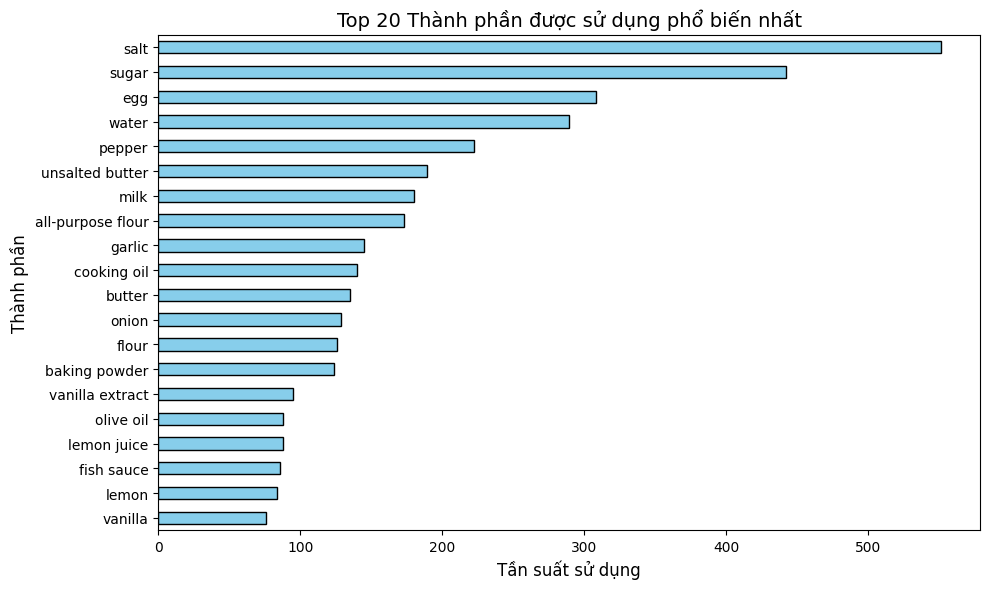

In [21]:
plt.figure(figsize=(10, 6))
top_20_cols.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Top 20 Thành phần được sử dụng phổ biến nhất', fontsize=14)
plt.xlabel('Tần suất sử dụng', fontsize=12)
plt.ylabel('Thành phần', fontsize=12)
plt.tight_layout()
plt.show()



#### ___Nhận xét___
- Thành phần phổ biến nhất:
    - Muối (salt) đứng đầu với tần suất sử dụng cao nhất, vượt trội so với các thành phần khác. Đây là một gia vị cơ bản và không thể thiếu trong hầu hết các món ăn.
- Các thành phần cơ bản khác:
    - Đường (sugar), trứng (egg), nước (water), và tiêu (pepper) cũng có tần suất sử dụng rất cao, cho thấy đây là những nguyên liệu thiết yếu trong cả nấu ăn và làm bánh.
- Chất béo và bột:
    - Các thành phần như bơ nhạt (unsalted butter), sữa (milk), dầu ăn (cooking oil), và các loại bột (all-purpose flour, baking powder, flour) xuất hiện nhiều, thể hiện vai trò quan trọng trong chế biến các món ăn và bánh.
- Gia vị và phụ liệu:
    - Tỏi (garlic), nước cốt chanh (lemon juice), nước mắm (fish sauce), và chiết xuất vani (vanilla extract) là những gia vị, phụ liệu thường dùng để tăng hương vị cho món ăn.
- Đa dạng ứng dụng:
    - Sự kết hợp giữa các thành phần cơ bản (muối, đường, trứng, bột) và các gia vị (tỏi, tiêu, nước mắm) cho thấy tập dữ liệu có thể liên quan đến nhiều loại món ăn, từ món ăn mặn đến món tráng miệng.
- Quan sát bổ sung:
    - Có sự phân hóa rõ rệt giữa các thành phần hàng đầu (muối, đường) và các thành phần xếp cuối (vanilla, lemon), cho thấy tần suất sử dụng không đồng đều.


#### ___Một số thông tin hữu ích___
- Thành phần thiết yếu trong nấu ăn
    - Muối (salt) và đường (sugar) là hai thành phần được sử dụng phổ biến nhất, cho thấy chúng là nguyên liệu cơ bản trong hầu hết các công thức nấu ăn, bất kể món ăn mặn hay ngọt.
    - Các thành phần như trứng (egg), nước (water), và tiêu (pepper) cũng rất phổ biến, nhấn mạnh vai trò của chúng trong nhiều loại món ăn từ món chính đến món tráng miệng.
- Đặc điểm của công thức trong dữ liệu
    - Sự xuất hiện đồng thời của bột mì (all-purpose flour), baking powder, và chiết xuất vani (vanilla extract) cho thấy tập dữ liệu này có thể chứa nhiều công thức làm bánh hoặc món ăn cần nướng.
    - Các thành phần như tỏi (garlic), nước mắm (fish sauce), và chanh (lemon) thường liên quan đến các món ăn châu Á hoặc món ăn mặn, cho thấy sự đa dạng về văn hóa ẩm thực.
- Thành phần cơ bản và bổ trợ
    - Bơ nhạt (unsalted butter) và dầu ăn (cooking oil) đều xuất hiện trong danh sách, cho thấy dầu mỡ đóng vai trò quan trọng trong chế biến, từ chiên xào đến nướng.
    - Các thành phần bổ trợ như nước cốt chanh (lemon juice) và vanilla extract ít xuất hiện hơn, chứng tỏ chúng thường là nguyên liệu đặc trưng dùng để gia giảm hương vị.
- Sự phổ biến theo tần suất
    - Các thành phần đầu bảng như muối và đường có tần suất sử dụng gấp đôi, thậm chí gấp ba lần so với các thành phần xếp cuối như nước mắm hay vanilla, điều này gợi ý rằng:
    - Muối và đường được sử dụng gần như trong mọi công thức.
    - Một số thành phần như nước mắm hoặc vanilla chỉ xuất hiện trong những món đặc trưng.
- Ứng dụng thực tế
    - Đối với đầu bếp hoặc nhà kinh doanh thực phẩm: Họ có thể ưu tiên trữ lượng lớn các thành phần phổ biến như muối, đường, và trứng vì chúng có tần suất sử dụng cao.
    - Đối với người lập kế hoạch sản xuất: Sự phổ biến của các nguyên liệu này có thể giúp xác định trọng tâm cho các chiến dịch quảng cáo hoặc phát triển sản phẩm.

#### __2. Khả năng kết hợp của các thành phần phổ biến__ 

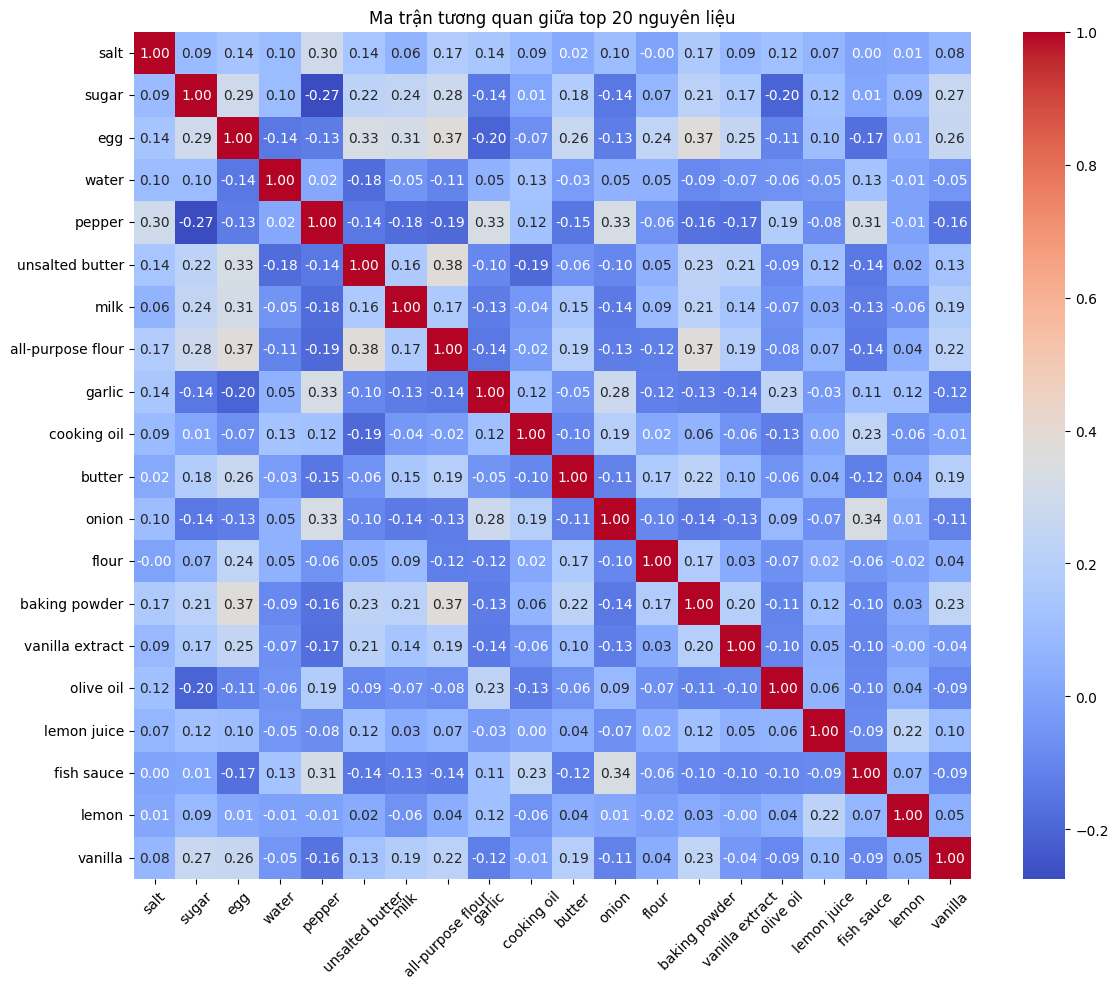

In [22]:
filtered_df = raw_df[top_20_cols.index]
correlation_matrix = filtered_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Ma trận tương quan giữa top 20 nguyên liệu')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### ___Nhận xét___
- Tương quan cao giữa các nguyên liệu (màu đỏ đậm)
    - Bột mì đa dụng (all-purpose flour) và baking powder có mức tương quan cao (~0.38): Đây là cặp nguyên liệu thường xuất hiện cùng nhau trong các công thức làm bánh.
    - Bơ nhạt (unsalted butter) và bột mì đa dụng (all-purpose flour): Mức độ tương quan cao (~0.37) cho thấy chúng cũng thường được sử dụng cùng trong các món bánh hoặc nướng.
- Tương quan thấp hoặc gần như không liên quan (màu xanh nhạt)
    - Nước mắm (fish sauce) và các nguyên liệu làm bánh (ví dụ: vanilla extract, baking powder): Tương quan thấp hoặc âm, điều này phản ánh sự khác biệt rõ ràng giữa món ăn mặn và món tráng miệng.
    - Tiêu (pepper) và đường (sugar): Mức tương quan thấp (~-0.27), cho thấy đường và tiêu ít khi được sử dụng cùng nhau.
- Sự liên quan nhóm nguyên liệu
    - Nhóm làm bánh: Các nguyên liệu như bột mì (flour), bột nở (baking powder), vani (vanilla extract), và bơ (butter) có mức độ liên quan cao, phản ánh nhóm nguyên liệu chính cho các món bánh.
    - Nhóm nấu ăn mặn: Nước mắm (fish sauce), tỏi (garlic), tiêu (pepper), và hành (onion) có xu hướng liên quan chặt chẽ hơn, phù hợp với các món ăn mặn trong nấu ăn.
- Nguyên liệu có vai trò trung gian
    - Muối (salt): Có mức tương quan nhẹ dương (~0.1–0.3) với hầu hết các nguyên liệu, cho thấy đây là thành phần cơ bản có thể xuất hiện trong cả món ăn mặn và món ngọt.
    - Dầu ăn (cooking oil): Tương quan tương đối đồng đều với nhiều nguyên liệu khác (~0.1–0.2), thể hiện tính linh hoạt trong cả làm bánh và nấu ăn.
- Ứng dụng thực tế
    - Đối với đầu bếp: Biểu đồ giúp nhận ra các cặp nguyên liệu thường xuất hiện cùng nhau để lên kế hoạch mua sắm và chuẩn bị nguyên liệu hiệu quả hơn.
    - Đối với nhà phát triển sản phẩm thực phẩm: Có thể sử dụng các cặp nguyên liệu có tương quan cao để thiết kế sản phẩm hoặc công thức mới, ví dụ: các sản phẩm bánh nướng nên ưu tiên kết hợp bơ, bột mì và bột nở.
    - Trong phân tích dữ liệu: Các mối quan hệ này có thể giúp tối ưu hóa cách gợi ý công thức trong các ứng dụng nấu ăn thông minh.

#### ___Mạng lưới hương vị: Mối quan hệ giữa top 20 nguyên liệu phổ biến___

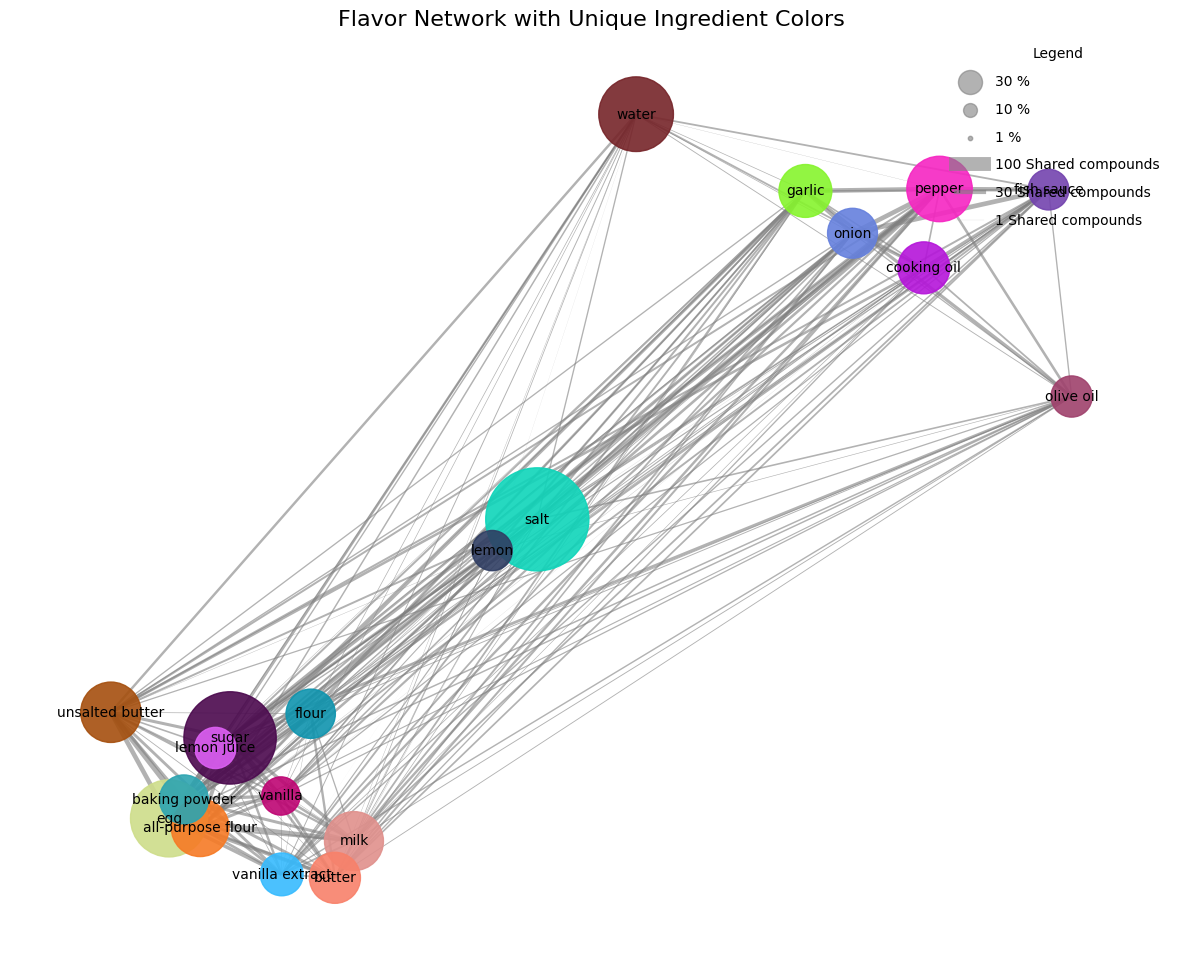

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import matplotlib.patches as mpatches


G = nx.Graph()

colors = {}
for ingredient, freq in top_20_cols.items():
    G.add_node(ingredient, size=freq)
    colors[ingredient] = (random.random(), random.random(), random.random())  
for ingredient1 in top_20_cols.keys():
    for ingredient2 in top_20_cols.keys():
        if ingredient1 != ingredient2:
            weight = correlation_matrix.loc[ingredient1, ingredient2]
            G.add_edge(ingredient1, ingredient2, weight=weight)

plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, seed=42)

node_sizes = [G.nodes[node]['size'] * 10 for node in G.nodes]
node_colors = [colors[node] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)

edges = G.edges(data=True)
edge_widths = [data['weight'] * 10 for _, _, data in edges]
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray', alpha=0.6)

nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
legend_sizes = [30, 10, 1]  
for size in legend_sizes:
    plt.scatter([], [], s=size * 10, color='gray', alpha=0.6, label=f'{size} %')


edge_widths_legend = [100, 30, 1] 
for width in edge_widths_legend:
    plt.plot([], [], linewidth=width / 10, color='gray', alpha=0.6, label=f'{width} Shared compounds')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper right', fontsize=10, title='Legend')
plt.title("Flavor Network with Unique Ingredient Colors", fontsize=16)
plt.axis('off')
plt.show()

#### ___Nhận xét___
- Kích thước nút
    - Kích thước của nút (node) phản ánh mức độ phổ biến hoặc tầm quan trọng của nguyên liệu trong mạng lưới.
    - Water (nước) và salt (muối) là các nút lớn nhất, cho thấy chúng là nguyên liệu phổ biến, được sử dụng rộng rãi và liên kết với nhiều nguyên liệu khác.
    - Olive oil (dầu ô liu) cũng là một nguyên liệu quan trọng trong mạng lưới, mặc dù ít liên kết hơn so với nước và muối.
- Màu sắc của nút
    - Mỗi nút có màu sắc riêng biệt để dễ nhận biết và đại diện cho các nguyên liệu khác nhau.
    - Nhóm làm bánh (flour, sugar, butter, vanilla) thường tập trung gần nhau.
    - Nhóm nguyên liệu mặn (pepper, garlic, onion, cooking oil) cũng nằm gần nhau, phản ánh sự tương đồng về cách sử dụng.
- Đường liên kết
    - Độ dày của đường liên kết thể hiện mức độ chia sẻ hợp chất hương vị giữa hai nguyên liệu.
    - Ví dụ: Salt (muối) có liên kết mạnh với lemon (chanh) và water (nước), phản ánh vai trò quan trọng của muối trong việc cân bằng hương vị.
    - Flour (bột mì) và baking powder có kết nối chặt chẽ, điều này phù hợp với các công thức làm bánh.
- Phân cụm nguyên liệu
    - Các nguyên liệu có xu hướng tạo thành cụm (cluster) gần nhau dựa trên ứng dụng thực tế:
    - Cụm nguyên liệu mặn: Garlic, onion, pepper, cooking oil thường được sử dụng cùng nhau trong các món ăn mặn.
    - Cụm nguyên liệu làm bánh: Flour, sugar, vanilla, butter xuất hiện trong các món bánh.
- Ứng dụng
    - Phát triển công thức nấu ăn: Các nguyên liệu có liên kết chặt chẽ có thể được kết hợp để tạo ra các món ăn mới hoặc cải thiện hương vị của món ăn hiện tại.
    - Phân tích dữ liệu ẩm thực: Dựa vào mạng lưới, các nhà nghiên cứu hoặc đầu bếp có thể tìm hiểu sâu hơn về sự tương thích hương vị giữa các nguyên liệu.

#### __3. Phân tích nguyên liệu đặc trưng cho từng món__

In [ ]:
rare_ingredients = sum_cols[sum_cols <= 1]
rare_dishes = raw_df[raw_df[rare_ingredients.index].sum(axis=1) > 0]
rare_dishes['Distinctive Ingredients'] = rare_dishes[rare_ingredients.index].apply(
    lambda row: ', '.join(row.index[row == 1].tolist()), axis=1
)

result = rare_dishes[['Name of dish', 'Distinctive Ingredients']].reset_index(drop=True)
result.head()

C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_23228\1714318676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rare_dishes['Distinctive Ingredients'] = rare_dishes[rare_ingredients.index].apply(


,Name of dish,Distinctive Ingredients
0,Answers to questions about moon cake ingredients,d ingredients
1,Blackberry crumble cheesecake bars,weetbix
2,"Chocolate, raspberry and ginger chocolate mous...",gelatin leaf
3,Coconut Cookies,please give test
4,Cookies with jam filling – Rosenmunnar,fruit jam according


#### ___Phần 2: Phân tích độ phức tạp của các món ăn dựa trên số lượng nguyên liệu cũng như độ phổ biến của chúng___

#### Đầu tiên chúng ta cùng quan sát xem, để tạo ra mỗi món ăn thì số nguyên liệu cần thiết thường là bao nhiêu?

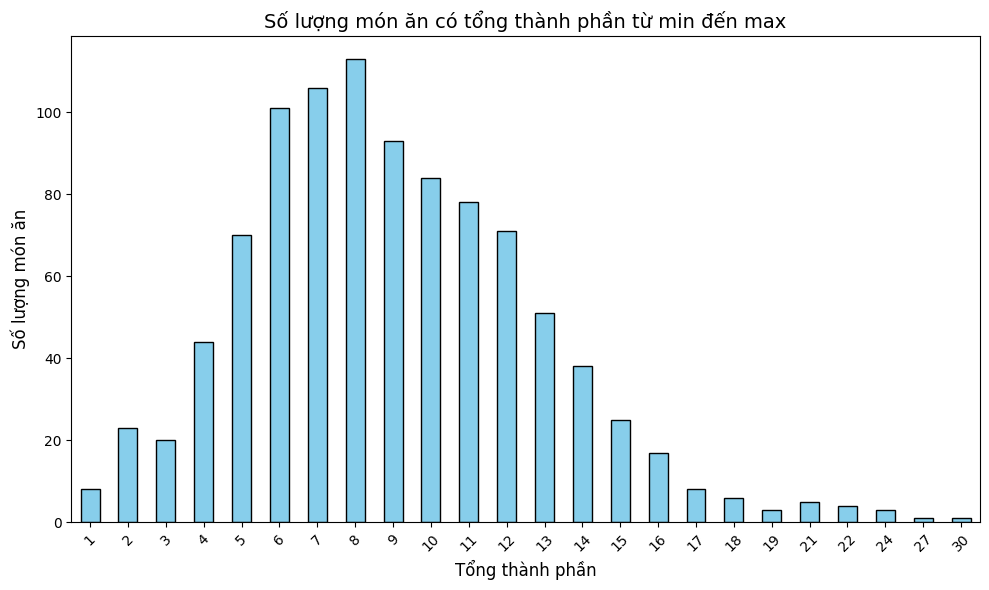

In [26]:
raw_df['Total'] = raw_df.iloc[:, 1:].sum(axis=1)

min_total = raw_df['Total'].min()
max_total = raw_df['Total'].max()

plt.figure(figsize=(10, 6))
raw_df['Total'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Số lượng món ăn có tổng thành phần từ min đến max', fontsize=14)
plt.xlabel('Tổng thành phần', fontsize=12)
plt.ylabel('Số lượng món ăn', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ___Nhận xét___
- Phân phối tổng thành phần:
    - Số lượng món ăn tăng dần khi tổng thành phần tăng từ 1 đến 8, đạt đỉnh tại khoảng 8 thành phần.
    - Sau đó, số lượng món ăn giảm dần khi tổng thành phần vượt qua 8, với rất ít món có tổng thành phần lớn hơn 20.
- Dạng phân phối:
    - Dữ liệu có xu hướng phân phối lệch phải, với nhiều món ăn tập trung ở số lượng thành phần nhỏ (1–15) và rất ít món có số lượng thành phần lớn (trên 20).
- Phổ biến nhất:
    - Tổng thành phần phổ biến nhất rơi vào khoảng 6–8, với hơn 100 món ăn trong các nhóm này.
- Độ hiếm:
    - Các món ăn có trên 15 thành phần là rất hiếm, chỉ chiếm tỷ lệ nhỏ trong tổng số món.

#### **1. Đánh giá độ phức tạp**

In [27]:
# số lượng nguyên liệu trong mỗi món ăn
ingredient_count = raw_df.iloc[:, 1:].sum(axis=1)
# tìm tần số xuất hiện của các nguyên liệu
ingredient_frequency = raw_df.iloc[:, 1:].sum()
# chuẩn hóa tần số xuất hiện của từng nguyên liệu về khoảng 0-1
normalized_ingredient_frequency = (ingredient_frequency - ingredient_frequency.min()) / (ingredient_frequency.max() - ingredient_frequency.min())

# tính điểm độ phức tạp
complexity_score = raw_df.mul(1-normalized_ingredient_frequency, axis=1).sum(axis=1)

# tạo dataframe tạm thời để lưu điểm độ phức tạp
temp_df = raw_df.copy()
temp_df['Complexity Score'] = complexity_score

# chia mức độ phức tạp thành 5 nhóm
def assign_stars(score, max_score):
    if score >= 0.8 * max_score:
        return 5
    elif score >= 0.6 * max_score:
        return 4
    elif score >= 0.4 * max_score:
        return 3
    elif score >= 0.2 * max_score:
        return 2
    else:
        return 1
    
max_score = temp_df['Complexity Score'].max()
temp_df['Complexity Level'] = temp_df['Complexity Score'].apply(lambda x: assign_stars(x, max_score))


C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_23228\2904085999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Complexity Level', data=temp_df, palette='coolwarm', edgecolor='black')


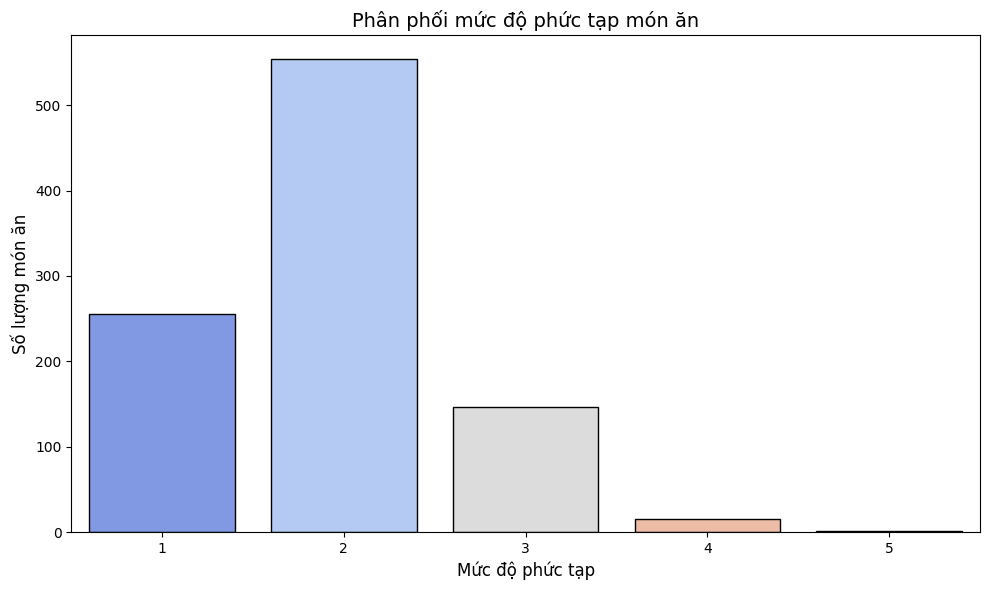

In [28]:
# vẽ biểu đồ phân phối mức độ phức tạp
plt.figure(figsize=(10, 6))
sns.countplot(x='Complexity Level', data=temp_df, palette='coolwarm', edgecolor='black')
plt.title('Phân phối mức độ phức tạp món ăn', fontsize=14)
plt.xlabel('Mức độ phức tạp', fontsize=12)
plt.ylabel('Số lượng món ăn', fontsize=12)
plt.tight_layout()
plt.show()


#### **Nhận xét**
- Đa số các món ăn trong dataset tạp trung ở mức độ phức tạp từ dễ đến trung bình (1-3).
- Các món có độ phức tạp cao hơn rất ít, cho thấy các món ăn đòi hỏi nhiểu nguyên liệu hiếm gặp, ít sử dụng là không phổ biến trong các món ăn thường ngày.
- Cụ thể, mức độ phức tạp **2** chiếm số lượng lớn nhất (khoảng 350 món ăn).
Tiếp đến là mức độ phức tạp **1** đứng thứ hai với hơn 200 món ăn. Còn lại, số lượng các món ăn được đánh giá ở các mức **3**, **4**, và **5** giảm dần rõ rệt, đặc biệt mức **5** chỉ chiếm tầm 1-5 món.

#### **2. Top món ăn có độ phức tạp cao**

C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_23228\802646360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Complexity Score', y='Name of dish', data=top_complex_meals, palette='coolwarm', edgecolor='black')


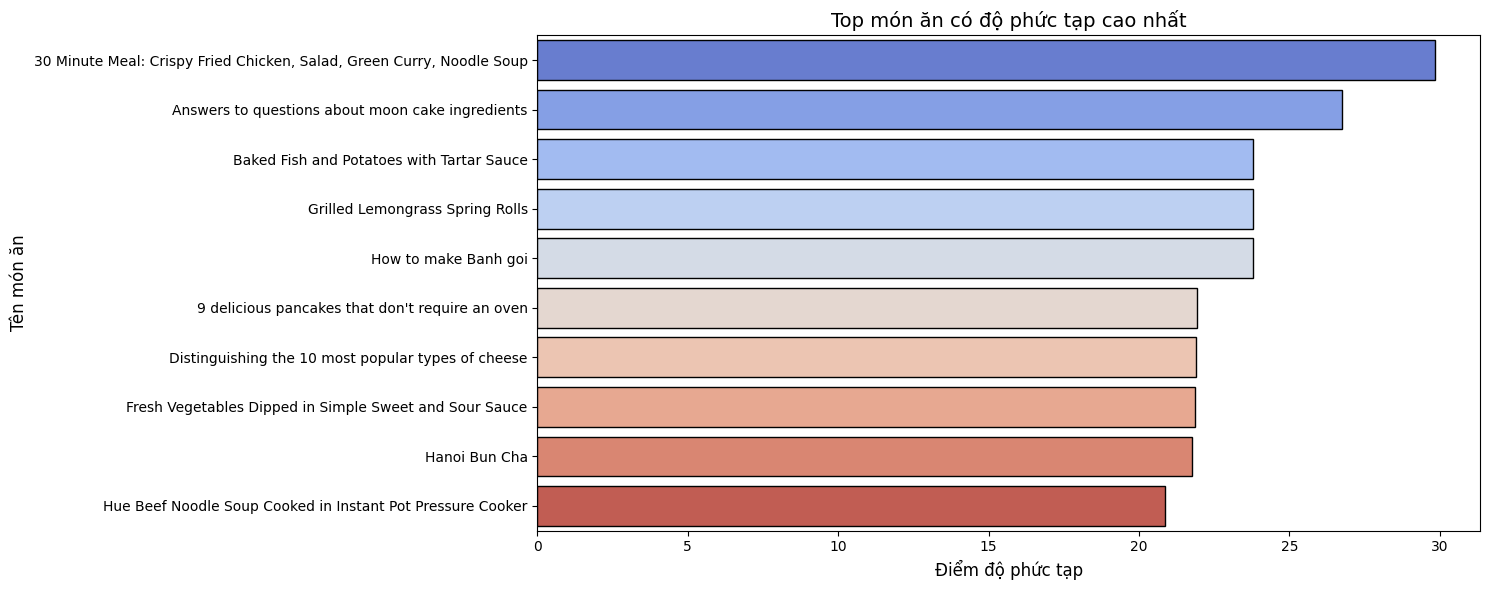

In [29]:
# top món ăn có độ phức tạp cao nhất
top_complex_meals = temp_df.sort_values('Complexity Score', ascending=False).head(10)[['Name of dish', 'Complexity Score']]

# vẽ biểu đồ cột cho top món ăn có độ phức tạp cao nhất
plt.figure(figsize=(15, 6))
sns.barplot(x='Complexity Score', y='Name of dish', data=top_complex_meals, palette='coolwarm', edgecolor='black')
plt.title('Top món ăn có độ phức tạp cao nhất', fontsize=14)
plt.xlabel('Điểm độ phức tạp', fontsize=12)
plt.ylabel('Tên món ăn', fontsize=12)
plt.tight_layout()
plt.show()


In [30]:
print('Số lượng nguyên liệu trong mỗi món ăn trên:\n')
result = "\n".join(
    f"{i+1}. Món {raw_df.loc[top_complex_meals.index[i], 'Name of dish']}: {ingredient_count[top_complex_meals.index[i]]}"
    for i in range(len(top_complex_meals))
)
print(result)


Số lượng nguyên liệu trong mỗi món ăn trên:

1. Món 30 Minute Meal: Crispy Fried Chicken, Salad, Green Curry, Noodle Soup: 60
2. Món Answers to questions about moon cake ingredients: 54
3. Món Baked Fish and Potatoes with Tartar Sauce: 48
4. Món Grilled Lemongrass Spring Rolls: 48
5. Món How to make Banh goi: 48
6. Món 9 delicious pancakes that don't require an oven: 44
7. Món Distinguishing the 10 most popular types of cheese: 44
8. Món Fresh Vegetables Dipped in Simple Sweet and Sour Sauce: 44
9. Món Hanoi Bun Cha: 44
10. Món Hue Beef Noodle Soup Cooked in Instant Pot Pressure Cooker: 42


#### **Nhận xét**
- Món *Gà rán giòn, Salat, Cà Ri Xanh, Mỳ Trộn* (*30 Minute Meal: Crispy Fried Chicken, Salad, Green Curry, Noodle Soup*) có điểm phức tạp cao nhất, vượt trội so với các món ăn còn lại, món ăn bao gồm nhiều loại nguyên liệu khác nhau và sử dụng một số nguyên liệu ít phổ biến.
- Các món còn lại không có sự chênh lệch quá nhiều, có điểm phức tạp tập trung dao động ở mức 18-21 và số lượng nguyên liệu của các món này nằm trong khoảng 18-20 nguyên liệu/món.

#### **3. Top món ăn có độ phức tạp thấp**

C:\Users\NGUYENDINHTRI\AppData\Local\Temp\ipykernel_23228\3318202588.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Complexity Score', y='Name of dish', data=top_less_complex_meals, palette='coolwarm', edgecolor='black')


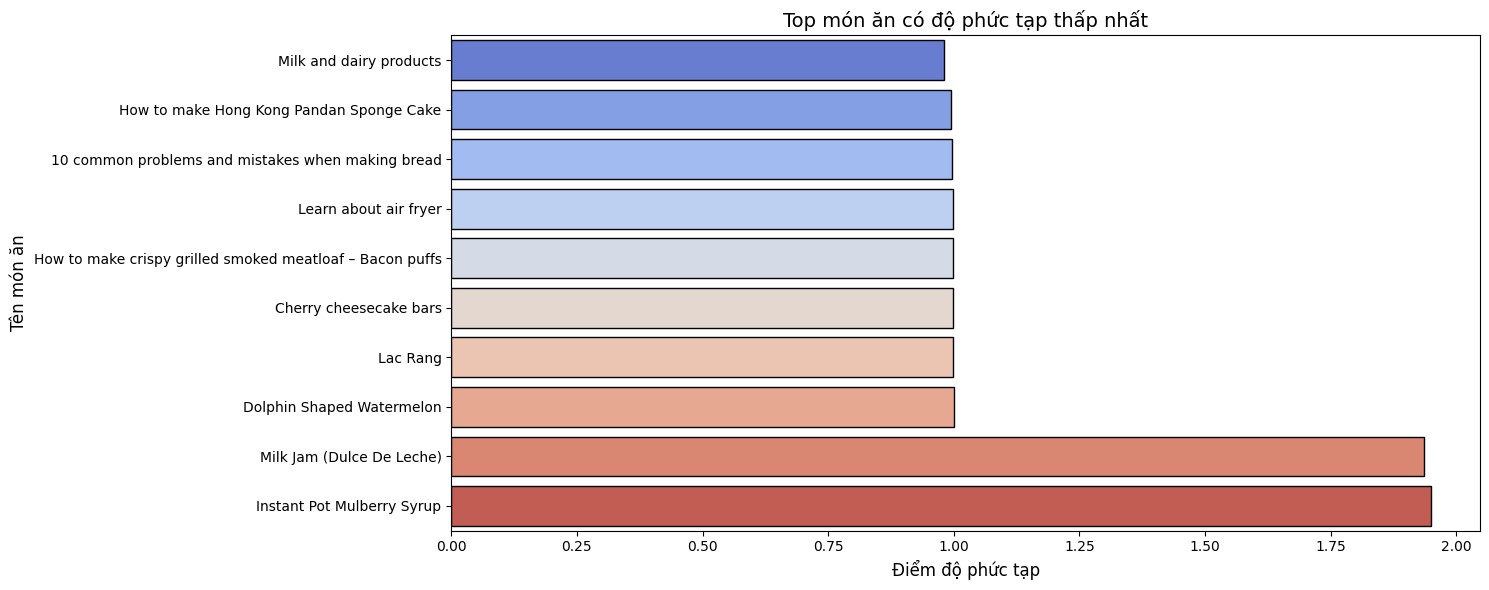

In [31]:
# top món ăn có độ phức tạp thấp nhất
top_less_complex_meals = temp_df.sort_values('Complexity Score', ascending=True).head(10)[['Name of dish', 'Complexity Score']]

# vẽ biểu đồ cột cho top món ăn có độ phức tạp thấp nhất
plt.figure(figsize=(15, 6))
sns.barplot(x='Complexity Score', y='Name of dish', data=top_less_complex_meals, palette='coolwarm', edgecolor='black')
plt.title('Top món ăn có độ phức tạp thấp nhất', fontsize=14)
plt.xlabel('Điểm độ phức tạp', fontsize=12)
plt.ylabel('Tên món ăn', fontsize=12)
plt.tight_layout()
plt.show()


In [32]:
print('Số lượng nguyên liệu trong mỗi món ăn trên:\n')
result = "\n".join(
    f"{i+1}. Món {raw_df.loc[top_less_complex_meals.index[i], 'Name of dish']}: {ingredient_count[top_less_complex_meals.index[i]]}"
    for i in range(len(top_less_complex_meals))
)
print(result)


Số lượng nguyên liệu trong mỗi món ăn trên:

1. Món Milk and dairy products: 2
2. Món How to make Hong Kong Pandan Sponge Cake: 2
3. Món 10 common problems and mistakes when making bread: 2
4. Món Learn about air fryer: 2
5. Món How to make crispy grilled smoked meatloaf – Bacon puffs: 2
6. Món Cherry cheesecake bars: 2
7. Món Lac Rang: 2
8. Món Dolphin Shaped Watermelon: 2
9. Món Milk Jam (Dulce De Leche): 4
10. Món Instant Pot Mulberry Syrup: 4


#### **Nhận xét:**
- Ngược lại với các món phức tạp ở phía trên, các món ăn ít phức tạp nhất chỉ cần số ít nguyên liệu để thực hiện (1-3 nguyên liệu).
- Tuy nhiên, mỗi món ăn trên có điểm phức tạp khác nhau tùy thuộc vào mức độ phổ biến của các nguyên liệu chúng sử dụng

#### ___Xác định thành phần chính của dữ liệu___

Áp dụng PCA để tìm các thành phần chính của tập dữ liệu

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Drop the "Name of dish" column
ingredients_data = raw_df.drop(columns=["Name of dish"])

# Standardize the data
scaler = StandardScaler()
ingredients_scaled = scaler.fit_transform(ingredients_data)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(ingredients_scaled)

# Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display explained variance ratio for the top 5 components
for i, variance in enumerate(explained_variance_ratio[:5], start=1):
    print(f"Principal Component {i}: {variance:.4f} explained variance ratio")

# (Optional) Save the PCA-transformed data to a file
pca_transformed_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])
pca_transformed_df.to_csv('F:/NM_KHDL/IntroDS-FinalPro-HandlingReal-WorldProblems/Source/Assert/pca_transformed_data.csv', index=False)
print("PCA-transformed data saved as 'pca_transformed_data.csv'.")



Principal Component 1: 0.0108 explained variance ratio
Principal Component 2: 0.0085 explained variance ratio
Principal Component 3: 0.0078 explained variance ratio
Principal Component 4: 0.0077 explained variance ratio
Principal Component 5: 0.0075 explained variance ratio
PCA-transformed data saved as 'pca_transformed_data.csv'.


#### 

#### ___Trực quan hóa dữ liệu sau khi áp dụng PCA(2D)___

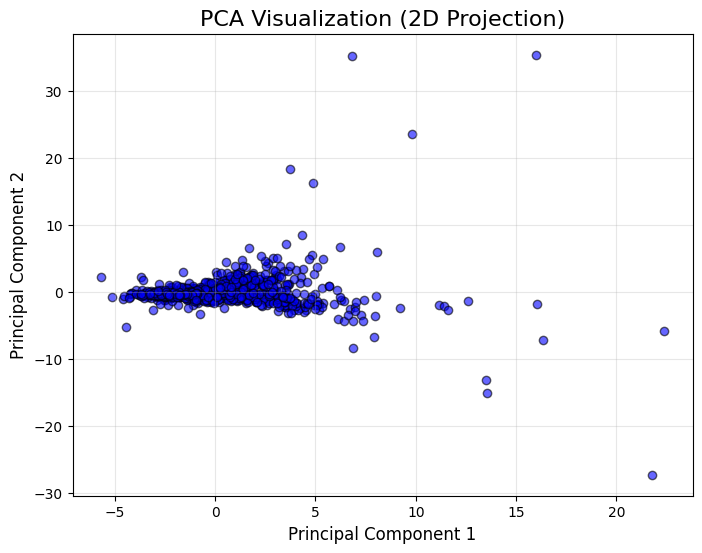

In [34]:
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(ingredients_scaled)

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], alpha=0.6, color='blue', edgecolor='k')
plt.title("PCA Visualization (2D Projection)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(alpha=0.3)
plt.show()